# EDA - Analisis Exploratorio.
- Lectura de fuente de datos.
    - https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

In [49]:
# Importando librrerias
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Consultando arhivos locales en ruta datasets / inputs
path_input_datasets = "../datasets/input/olimpiadas/"
path_output = "../datasets/output/"
os.listdir(path_input_datasets)
#os.mkdir("../datasets/output")

['athlete_events.csv', 'noc_regions.csv']

In [4]:
olympics = pd.read_csv(path_input_datasets+'athlete_events.csv')
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# verificando columnas
olympics.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [7]:
# Verificando cantidad de filas y columnas.
olympics.shape

(271116, 15)

In [8]:
# Verificando el indice del datset.
olympics.index

RangeIndex(start=0, stop=271116, step=1)

### 01 - Anaisis de datos con (Info, Cantidad, Porcentajes, valores nulos).

In [9]:
# Obteniendo Informacion.
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [74]:
# Obtener una cuenta de los valores nulos en cada una de las columnas con isnull.
olympics.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [13]:
# Obtener porcentaje de los valores nulos en cada una de las columnas con mean.
olympics.isnull().mean()

ID        0.000000
Name      0.000000
Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Games     0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.853262
dtype: float64

### 02 - Analisis de datos con (value, counts)

In [14]:
# Explorando valores repetidos.
london = olympics.query('Games == "2012 Summer"')
london.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN
134,48,Abdelhak Aatakni,M,24.0,NaN,64.0,Morocco,MAR,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Light-Welterweight,NaN
164,67,Mariya Vasilyevna Abakumova (-Tarabina),F,26.0,179.0,80.0,Russia,RUS,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Javelin Throw,NaN
174,73,Luc Abalo,M,27.0,182.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Gold


In [15]:
# Validando si name aparece mas de una vez.
london['Name'].value_counts()

Name
Koji Yamamuro                8
Oleh Yuriyovych Verniaiev    8
Kim Su-Myeon                 8
Flavius Koczi                8
Kristian James Thomas        8
                            ..
Ivan Horvat                  1
Lidija Horvat                1
Nikolina Horvat              1
Zlatko Horvat                1
ukasz Tomasz ygado           1
Name: count, Length: 10502, dtype: int64

In [20]:
# Filtrando por atletas para comparar los eventos en los que ha participado.
london.query('Name == "Kim Su-Myeon"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
119081,60273,Kim Su-Myeon,M,25.0,165.0,57.0,South Korea,KOR,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,NaN
119082,60273,Kim Su-Myeon,M,25.0,165.0,57.0,South Korea,KOR,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,NaN
119083,60273,Kim Su-Myeon,M,25.0,165.0,57.0,South Korea,KOR,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Floor Exercise,NaN
119084,60273,Kim Su-Myeon,M,25.0,165.0,57.0,South Korea,KOR,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,NaN
119085,60273,Kim Su-Myeon,M,25.0,165.0,57.0,South Korea,KOR,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Parallel Bars,NaN
119086,60273,Kim Su-Myeon,M,25.0,165.0,57.0,South Korea,KOR,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Horizontal Bar,NaN
119087,60273,Kim Su-Myeon,M,25.0,165.0,57.0,South Korea,KOR,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Rings,NaN
119088,60273,Kim Su-Myeon,M,25.0,165.0,57.0,South Korea,KOR,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,NaN


### 03 - Analisis de datos con (unique - nunique)

In [16]:
# Obtener los valores unicos de la columna City.
olympics['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [17]:
# Obtener el tamaño de los valores unicos de la columna City.
len(olympics['City'].unique())

42

In [18]:
olympics['City'].unique().size

42

In [25]:
olympics['City'].nunique()

42

In [27]:
sorted(olympics['City'].unique())

['Albertville',
 'Amsterdam',
 'Antwerpen',
 'Athina',
 'Atlanta',
 'Barcelona',
 'Beijing',
 'Berlin',
 'Calgary',
 'Chamonix',
 "Cortina d'Ampezzo",
 'Garmisch-Partenkirchen',
 'Grenoble',
 'Helsinki',
 'Innsbruck',
 'Lake Placid',
 'Lillehammer',
 'London',
 'Los Angeles',
 'Melbourne',
 'Mexico City',
 'Montreal',
 'Moskva',
 'Munich',
 'Nagano',
 'Oslo',
 'Paris',
 'Rio de Janeiro',
 'Roma',
 'Salt Lake City',
 'Sankt Moritz',
 'Sapporo',
 'Sarajevo',
 'Seoul',
 'Sochi',
 'Squaw Valley',
 'St. Louis',
 'Stockholm',
 'Sydney',
 'Tokyo',
 'Torino',
 'Vancouver']

### 03 - Analisis de datos con (min - max)

In [19]:
# Identificacion de los aos que se tienen en el dataset.
olympics['Year'].unique()

array([1992, 2012, 1920, 1900, 1988, 1994, 1932, 2002, 1952, 1980, 2000,
       1996, 1912, 1924, 2014, 1948, 1998, 2006, 2008, 2016, 2004, 1960,
       1964, 1984, 1968, 1972, 1936, 1956, 1928, 1976, 2010, 1906, 1904,
       1908, 1896], dtype=int64)

In [29]:
# Identificacion de los valores minimos que se tienen en el dataset.
olympics['Year'].min()

1896

In [30]:
# Identificacion de los valores maximos que se tienen en el dataset.
olympics['Year'].max()

2016

In [34]:
# Obteniendo cantidad de años de los juegos olimpicos.
olympics['Year'].max() - olympics['Year'].min()

120

In [35]:
# obteniendo valores maximos de una variable categorica.
olympics['City'].max()

'Vancouver'

In [36]:
# obteniendo valores minimos de una variable categorica.
olympics['City'].min()

'Albertville'

### 04 - Analisis de datos con (mean - median - mode)

In [37]:
# calcular medidas de centralidad en variables numericas.
# Calculando la media que es iguala al promedio.
olympics['Age'].mean()

25.556898357297374

In [38]:
# calcular medidas de centralidad en variables numericas.
# Calculando la mediana que se fija en el valor que esta en el medio, ordenando la columna.
olympics['Age'].median()

24.0

In [39]:
# calcular medidas de centralidad en variables numericas.
# Calculando la moda que es equivalente al valor mas frecuente de la columna.
olympics['Age'].mode()

0    23.0
Name: Age, dtype: float64

In [29]:
# Para validar los datos de moda, se puede usar la funcion value_counts que retorna el valor mas usado en la columna.
olympics['Age'].value_counts()

Age
23.0    21875
24.0    21720
22.0    20814
25.0    19707
21.0    19164
        ...  
77.0        2
84.0        1
10.0        1
96.0        1
97.0        1
Name: count, Length: 74, dtype: int64

### 05 - Analisis de datos con Diferencias entre (mean - median)

In [20]:
import numpy as np

In [24]:
# Creando arregle para ejemplo.
edades = np.array([10,15,16,17,18,18,18,19,20,21,22,23,24,27,29,30,40,50,60])

In [25]:
np.mean(edades)

25.105263157894736

In [26]:
np.median(edades)

21.0

### 06 - Analisis de datos (mean - median - dataframes y nulos)

In [31]:
# filtrando por columnas especificas o todo un dataframe.
olympics[['Age','Height','Weight']].mean()

Age        25.556898
Height    175.338970
Weight     70.702393
dtype: float64

In [32]:
# filtrando por columnas especificas o todo un dataframe.
olympics[['Age','Height','Weight']].median()

Age        24.0
Height    175.0
Weight     70.0
dtype: float64

In [33]:
# filtrando por columnas especificas o todo un dataframe.
olympics[['Age','Height','Weight']].mode()

,Age,Height,Weight
0,23.0,180.0,70.0


### 07 - Analisis de datos Medidas de dispersion (std - var)

In [34]:
# obteniendo la desviacion estandar de la columna AGE.
olympics['Age'].std()

6.393560847035813

In [35]:
# obteniendo la varianza de la columna AGE.
olympics['Age'].var()

40.87762030474931

### 08 - Analisis de datos (describe)

In [37]:
# Descripcion de los datos para los 3 campos [Age, Height, Weight].
olympics[['Age','Height','Weight']].describe()

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


### 09 - Analisis de datos (percentiles)

In [38]:
# Descripcion de los datos para los 3 campos [Age, Height, Weight] ampliando el rango de percentiles.
olympics[['Age','Height','Weight']].describe(percentiles=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90])

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
10%,19.000000,162.000000,54.000000
20%,21.000000,167.000000,59.000000
30%,22.000000,170.000000,63.000000
40%,23.000000,173.000000,66.000000
50%,24.000000,175.000000,70.000000
60%,26.000000,178.000000,73.000000


### 10 - Analisis de datos (Histogramas)

<Axes: xlabel='Height', ylabel='Count'>

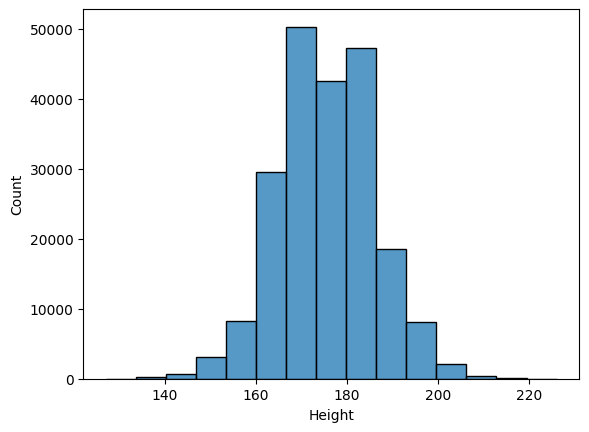

In [111]:
# Analisando datos con histogramas libreria seaborn, usando beans = 15.
sb.histplot(olympics, x='Height', bins=15)

In [112]:
# Generando lista de datos con numpy.
np.histogram(olympics['Height'].dropna(), bins= 15)

(array([   27,   188,   641,  3045,  8259, 29568, 50285, 42460, 47224,
        18478,  8170,  2095,   362,   126,    17], dtype=int64),
 array([127. , 133.6, 140.2, 146.8, 153.4, 160. , 166.6, 173.2, 179.8,
        186.4, 193. , 199.6, 206.2, 212.8, 219.4, 226. ]))

### 11 - Analisis de datos (Seaborn - Matplotlib)

<Axes: ylabel='Frequency'>

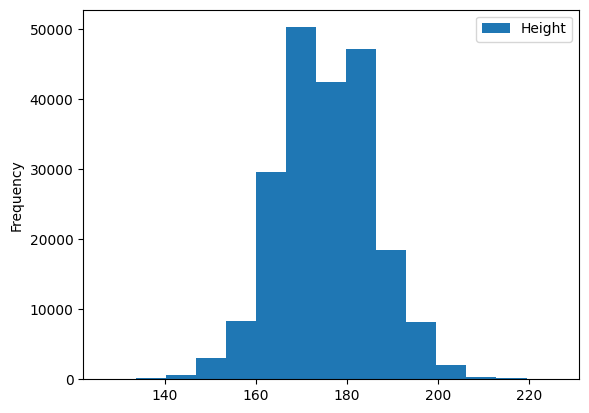

In [42]:
# Generando plot para el campo Height.
olympics.plot(kind= 'hist', y='Height',bins = 15)

(array([2.7000e+01, 1.8800e+02, 6.4100e+02, 3.0450e+03, 8.2590e+03,
        2.9568e+04, 5.0285e+04, 4.2460e+04, 4.7224e+04, 1.8478e+04,
        8.1700e+03, 2.0950e+03, 3.6200e+02, 1.2600e+02, 1.7000e+01]),
 array([127. , 133.6, 140.2, 146.8, 153.4, 160. , 166.6, 173.2, 179.8,
        186.4, 193. , 199.6, 206.2, 212.8, 219.4, 226. ]),
 <BarContainer object of 15 artists>)

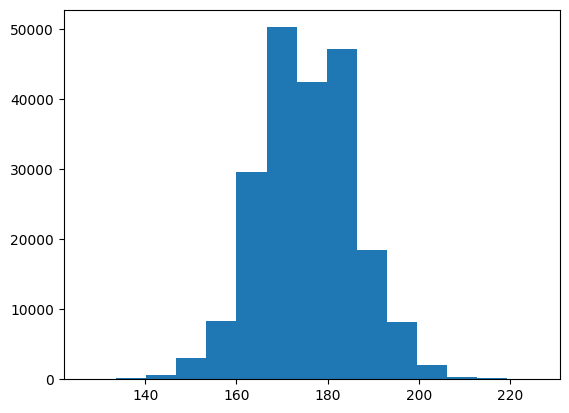

In [43]:
# Generando histograma con hist.
plt.hist(olympics['Height'], bins=15)

In [113]:
sb.reset_orig()

<Axes: ylabel='Frequency'>

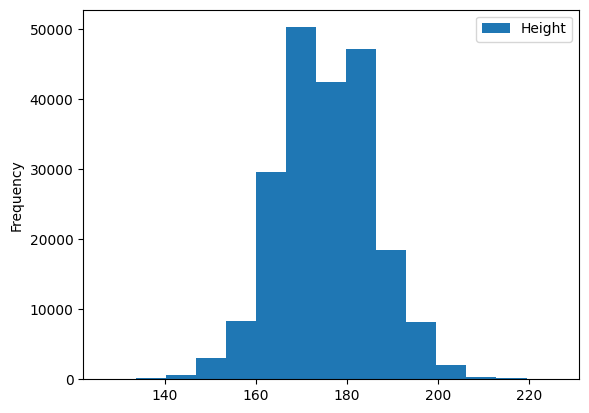

In [6]:
%matplotlib inline
olympics.plot(kind='hist', y='Height', bins=15)

### 12 - Analisis de datos (Histogramas hue)

In [7]:
# Validando DataFrame.
olympics.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [8]:
# Revisando los valores unicos de la columna Sport.
olympics['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [9]:
# Creacion de nuevo dataframe con valores Basketball y Gymnastics de la columna Sport.
basket_gym = olympics[olympics['Sport'].isin(['Basketball', 'Gymnastics'])]

In [10]:
basket_gym.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


<Axes: xlabel='Height', ylabel='Count'>

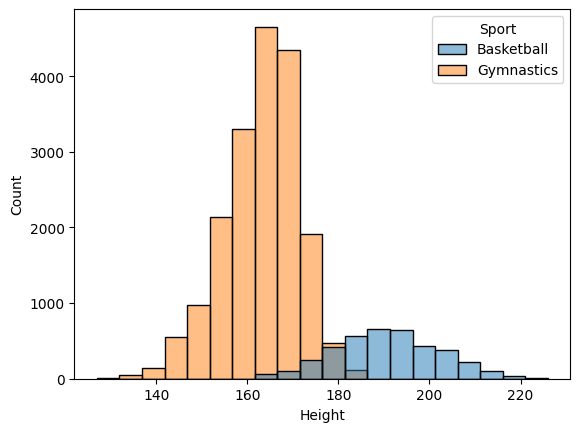

In [11]:
# graficando valores con seaborn.

sb.histplot(basket_gym, x = 'Height', bins = 20, hue = 'Sport')


### 13 - Analisis de datos (boxplot)

<Axes: ylabel='Height'>

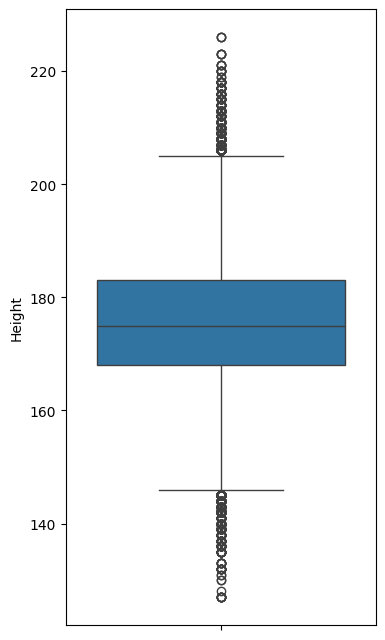

In [12]:
# Graficando diagrama de cajas con boxplot.
plt.figure(figsize = (4,8)) 
sb.boxplot(data=olympics, y='Height')

### 13 - Analisis de datos (boxplot x-y)

<Axes: xlabel='Sport', ylabel='Height'>

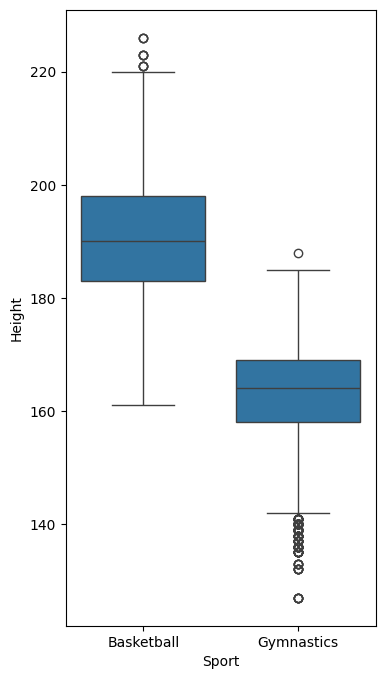

In [13]:
# Graficando diagrama de cajas con boxplot.
plt.figure(figsize = (4,8)) 
sb.boxplot(data=basket_gym, y = 'Height', x = 'Sport')

### 14 - Analisis de datos (Histograma vs Boxplot)

<Axes: xlabel='Height', ylabel='Count'>

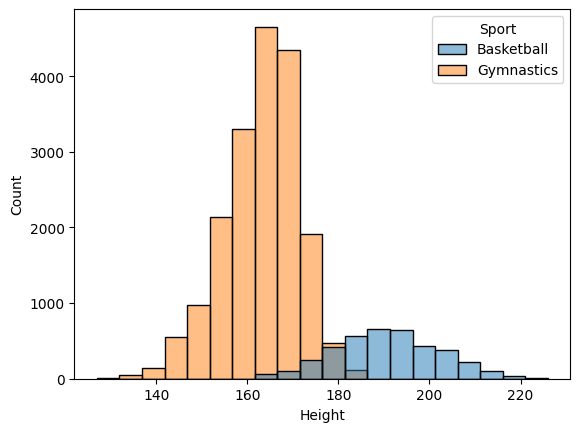

In [14]:
sb.histplot(basket_gym, x = 'Height', bins = 20, hue = 'Sport')

<Axes: ylabel='Height'>

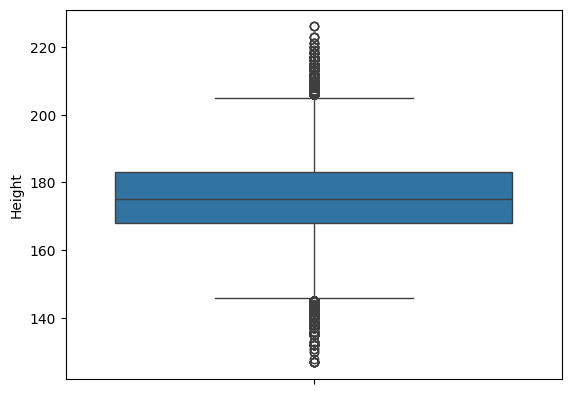

In [15]:
sb.boxplot(data=olympics, y='Height')

### 15 - Analisis de datos (Correlacion de Pearson)

<Axes: xlabel='Height', ylabel='Weight'>

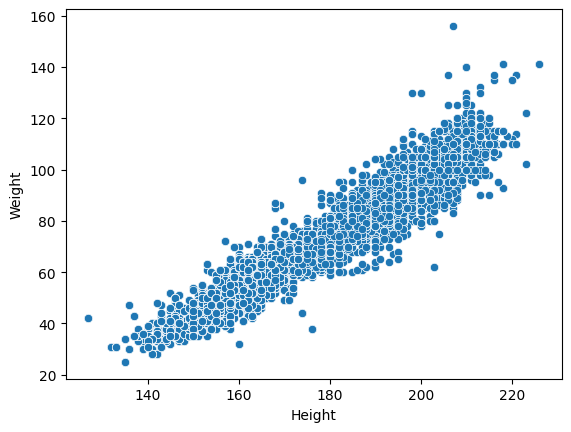

In [16]:
sb.scatterplot(data = basket_gym, x='Height', y = 'Weight')

<Axes: xlabel='Height', ylabel='Age'>

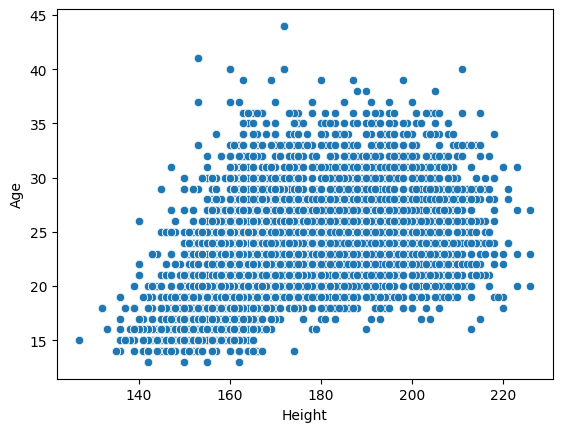

In [18]:
# Analizando datos con altura y edad con una correlacion de pearson.
sb.scatterplot(data = basket_gym, x='Height', y = 'Age')

### 16 - Analisis de datos (Correlacion)

In [19]:
basket_gym[['Age','Height','Weight','Sport']].head()

,Age,Height,Weight,Sport
0,24.0,180.0,80.0,Basketball
41,28.0,175.0,64.0,Gymnastics
42,28.0,175.0,64.0,Gymnastics
43,28.0,175.0,64.0,Gymnastics
44,28.0,175.0,64.0,Gymnastics


In [22]:
# Realizando correlacion a variables seleccionadas.
basket_gym[['Age','Height','Weight']].corr()


,Age,Height,Weight
Age,1.000000,0.458235,0.525656
Height,0.458235,1.000000,0.936603
Weight,0.525656,0.936603,1.000000


### 17 - Analisis de datos (Headmap)

<Axes: >

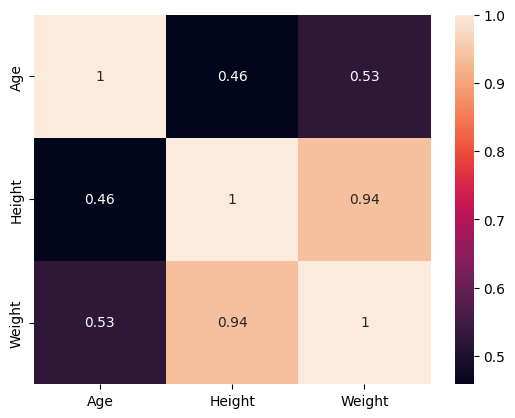

In [27]:
# Visualizacion de datos con headmap para validar la matriz de correlacion.
sb.heatmap(basket_gym[['Age','Height','Weight']].corr(), annot=True)

### 18 - Analisis de datos (Pairplot)

c:\Users\Oscar\anaconda3\envs\dev-ia\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


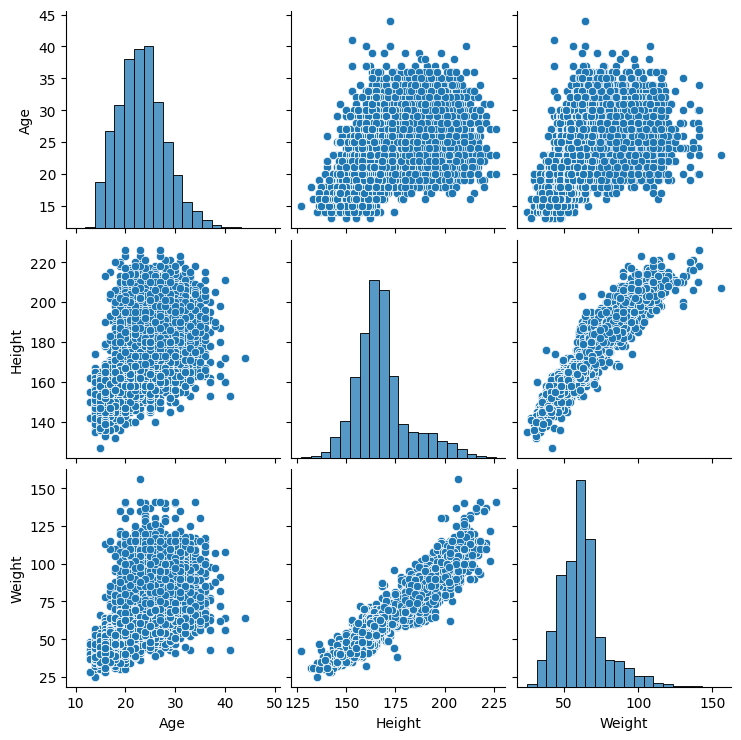

In [29]:
sb.pairplot(basket_gym[['Age','Height','Weight']], diag_kws={'bins':20})

c:\Users\Oscar\anaconda3\envs\dev-ia\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


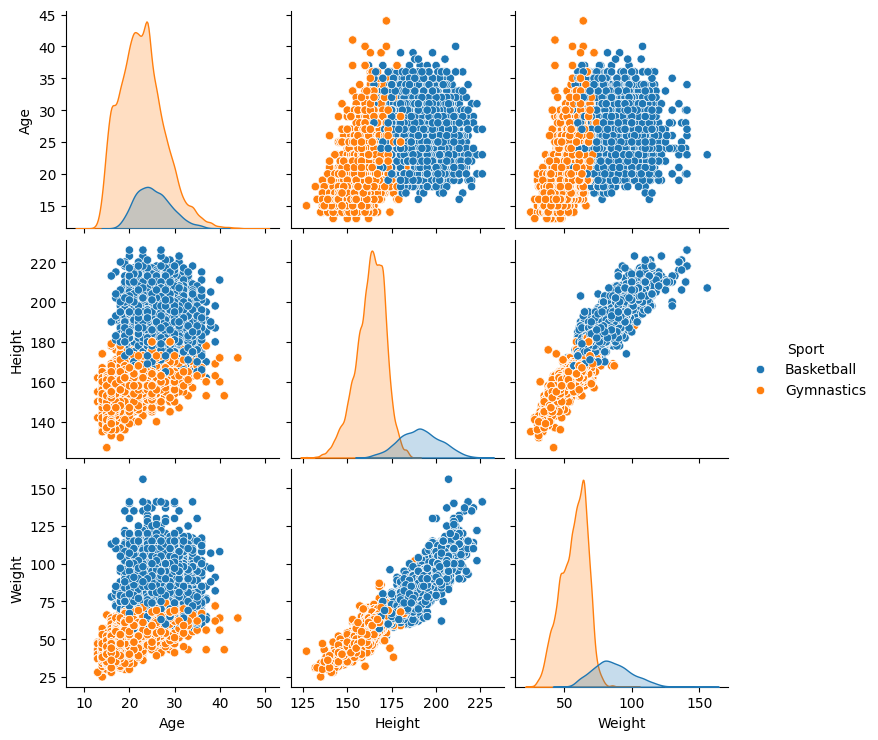

In [30]:
sb.pairplot(basket_gym[['Age','Height','Weight','Sport']], hue='Sport')

### 19 - Analisis de datos (Ejercicio)
- https://www.kaggle.com/datasets/parulpandey/forbes-highest-paid-athletes-19902019

In [31]:
forbes = pd.read_csv(path_input_datasets+'Forbes Richest Athletes 1990-2020.csv')
forbes.head(2)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0


In [55]:
forbes = forbes.rename(columns={'Previous Year Rank':'Previous_Year_Rank', 'earnings ($ million)':'Earnings'})
forbes.head(2)

,S.NO,Name,Nationality,Current Rank,Previous_Year_Rank,Sport,Year,Earnings
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0


### 20 - Realizando Analisis de datos (Ejercicio)

In [56]:
# Verificar los tipos de datos de las columnas.
forbes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.NO                301 non-null    int64  
 1   Name                301 non-null    object 
 2   Nationality         301 non-null    object 
 3   Current Rank        301 non-null    int64  
 4   Previous_Year_Rank  277 non-null    object 
 5   Sport               301 non-null    object 
 6   Year                301 non-null    int64  
 7   Earnings            301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [57]:
# Verificar cantidad de valores nulos por variables.
forbes.isnull().sum()

S.NO                   0
Name                   0
Nationality            0
Current Rank           0
Previous_Year_Rank    24
Sport                  0
Year                   0
Earnings               0
dtype: int64

In [58]:
# Verificar descripcin de los campos.
forbes.describe()

,S.NO,Current Rank,Year,Earnings
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


In [59]:
# Validando valores Nulos.
forbes.query('Previous_Year_Rank.isnull()')

,S.NO,Name,Nationality,Current Rank,Previous_Year_Rank,Sport,Year,Earnings
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


In [60]:
# Analisando los datos del atleta Stephen Curry para conocer porque no tiene informacion de Previous_Year_Rank en el 2017
forbes.query('Name == "Stephen Curry"')

,S.NO,Name,Nationality,Current Rank,Previous_Year_Rank,Sport,Year,Earnings
268,269,Stephen Curry,USA,8,NaN,Basketball,2017,47.3
278,279,Stephen Curry,USA,8,8,Basketball,2018,76.9
289,290,Stephen Curry,USA,9,8,Basketball,2019,79.8
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4


In [61]:
# Analisis de los atletas que aparecen mas de una vez.
forbes['Name'].value_counts()

Name
Tiger Woods           19
Michael Jordan        19
Kobe Bryant           14
LeBron James          13
Michael Schumacher    13
                      ..
Tom Brady              1
Michael Moorer         1
Dale Earnhardt Jr.     1
Greg Norman            1
Carson Wentz           1
Name: count, Length: 82, dtype: int64

In [62]:
# Analisis de las nacionalidades que aparecen mas en los datasets.
forbes['Nationality'].value_counts()

Nationality
USA                 206
UK                   13
Germany              13
Switzerland          12
Portugal             10
Brazil                9
Argentina             9
Canada                6
Italy                 4
Finland               3
France                3
Philippines           3
Russia                1
Australia             1
Dominican             1
Austria               1
Filipino              1
Spain                 1
Serbia                1
Northern Ireland      1
Ireland               1
Mexico                1
Name: count, dtype: int64

In [63]:
# Realizando analisis por el año de 1990.
forbes.query('Year == 1990')

,S.NO,Name,Nationality,Current Rank,Previous_Year_Rank,Sport,Year,Earnings
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


<Axes: xlabel='Sport', ylabel='count'>

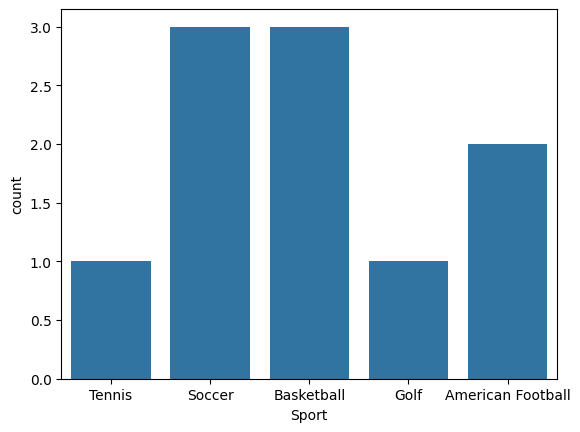

In [64]:
# Realizando analisiss grafico para el año 2020 con la columna deporte.
sb.countplot(data = forbes.query('Year == 2020'), x = 'Sport')

<Axes: xlabel='Sport', ylabel='count'>

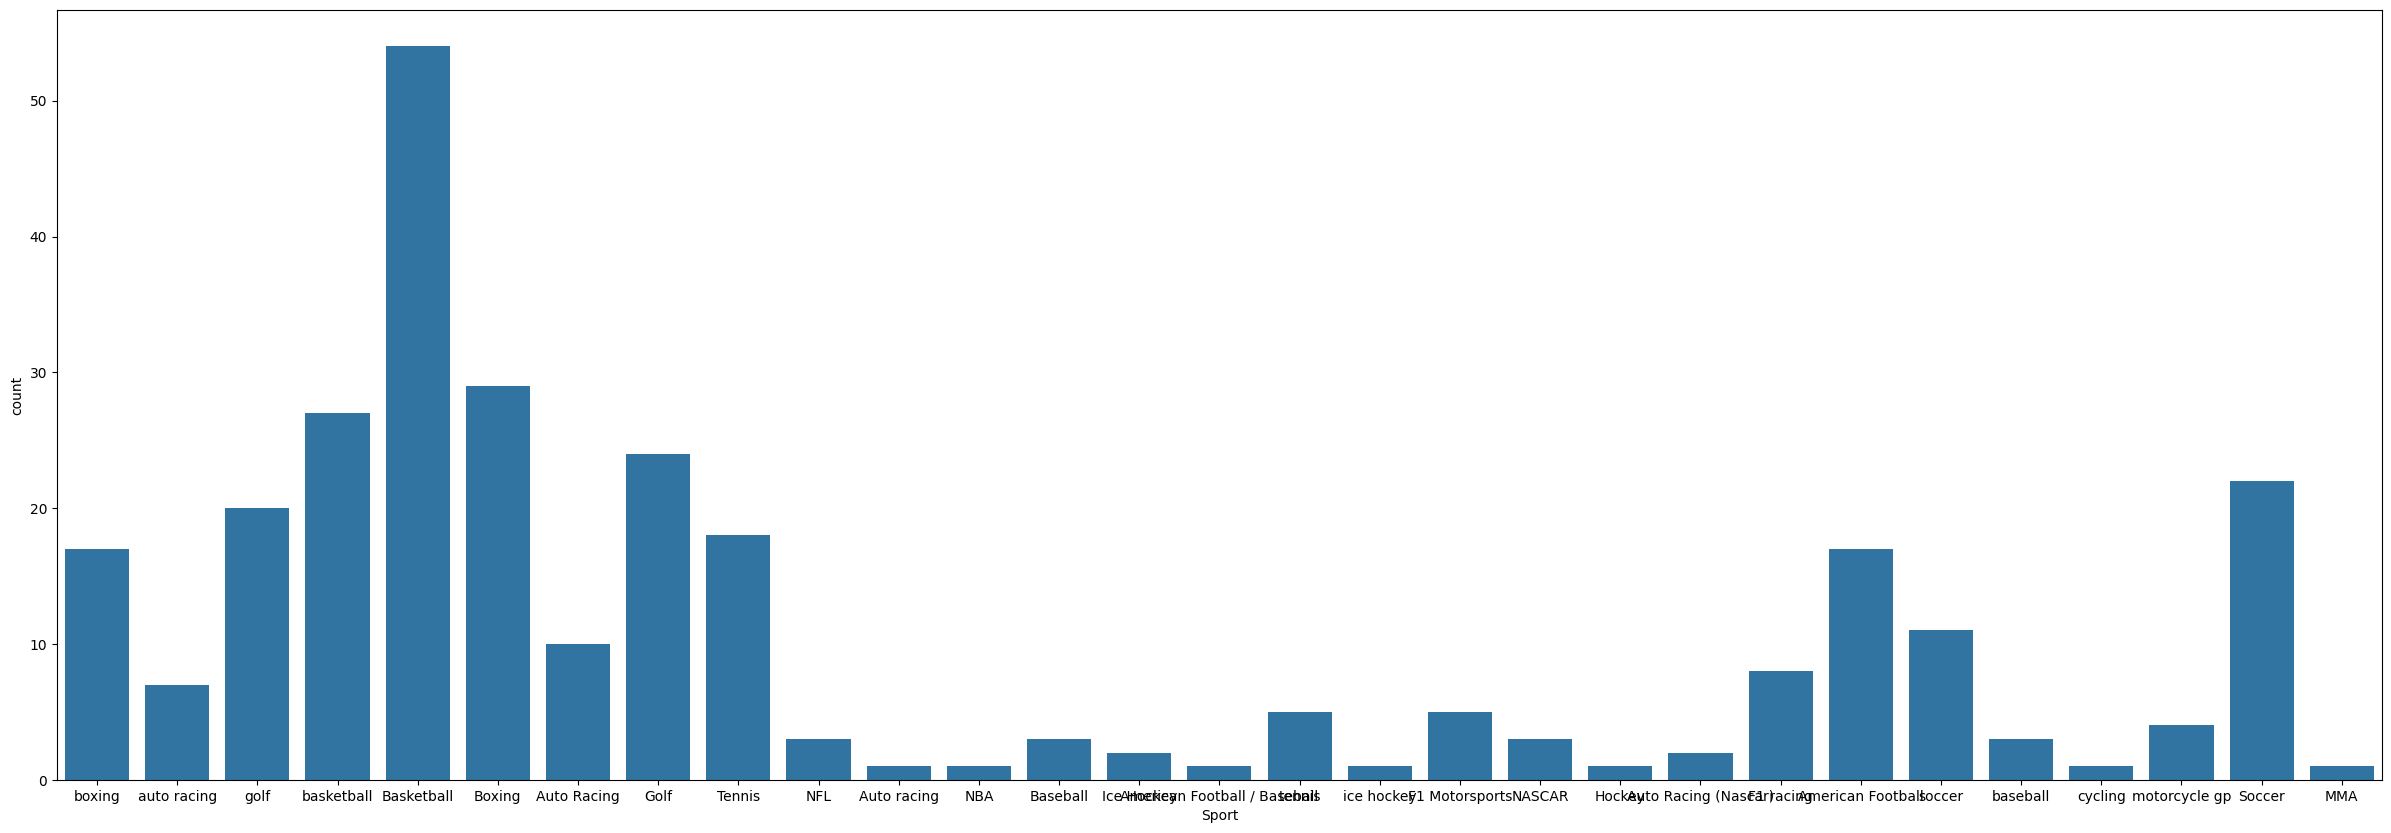

In [65]:
plt.figure(figsize=(30,10))
sb.countplot(data = forbes, x = 'Sport')

<Axes: xlabel='Earnings', ylabel='Count'>

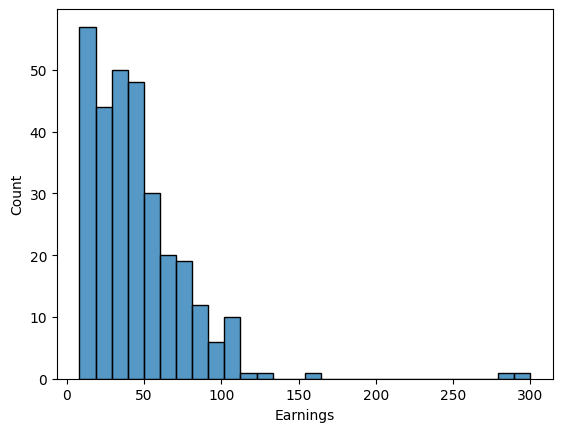

In [68]:
# Analisis de un histograma con la columna Earnings.
sb.histplot(data=forbes, x = 'Earnings')

In [1]:
# Analisis de un histograma con boxplot y la columna Earnings.
plt.figure(figsize=(5,10))
sb.boxplot(data=forbes, y = 'Earnings')

SyntaxError: invalid syntax (2573861604.py, line 3)

In [70]:
# Verificando los atletas con valores anomalos.
forbes.query('Earnings > 200')

,S.NO,Name,Nationality,Current Rank,Previous_Year_Rank,Sport,Year,Earnings
241,242,Floyd Mayweather,USA,1,1,Boxing,2015,300.0
271,272,Floyd Mayweather,USA,1,>100,Boxing,2018,285.0


In [71]:
# Verificando los atletas con valores anomalos.
forbes.query('Earnings > 112')

,S.NO,Name,Nationality,Current Rank,Previous_Year_Rank,Sport,Year,Earnings
171,172,Tiger Woods,USA,1,1,golf,2008,115.0
241,242,Floyd Mayweather,USA,1,1,Boxing,2015,300.0
242,243,Manny Pacquiao,Philippines,2,11,Boxing,2015,160.0
271,272,Floyd Mayweather,USA,1,>100,Boxing,2018,285.0
281,282,Lionel Messi,Argentina,1,2,Soccer,2019,127.0


In [72]:
# Analisando los deportistas mas pagados en 2018..
forbes.query('Year == 2018')

,S.NO,Name,Nationality,Current Rank,Previous_Year_Rank,Sport,Year,Earnings
271,272,Floyd Mayweather,USA,1,>100,Boxing,2018,285.0
272,273,Lionel Messi,Argentina,2,3,Soccer,2018,111.0
273,274,Cristiano Ronaldo,Portugal,3,1,Soccer,2018,108.0
274,275,Conor McGregor,Ireland,4,24,MMA,2018,99.0
275,276,Neymar,Brazil,5,18,Soccer,2018,90.0
276,277,LeBron James,USA,6,2,Basketball,2018,85.5
277,278,Roger Federer,Switzerland,7,4,Tennis,2018,77.2
278,279,Stephen Curry,USA,8,8,Basketball,2018,76.9
279,280,Matt Ryan,USA,9,>100,American Football,2018,67.3
280,281,Matthew Stafford,USA,10,>100,American Football,2018,59.5


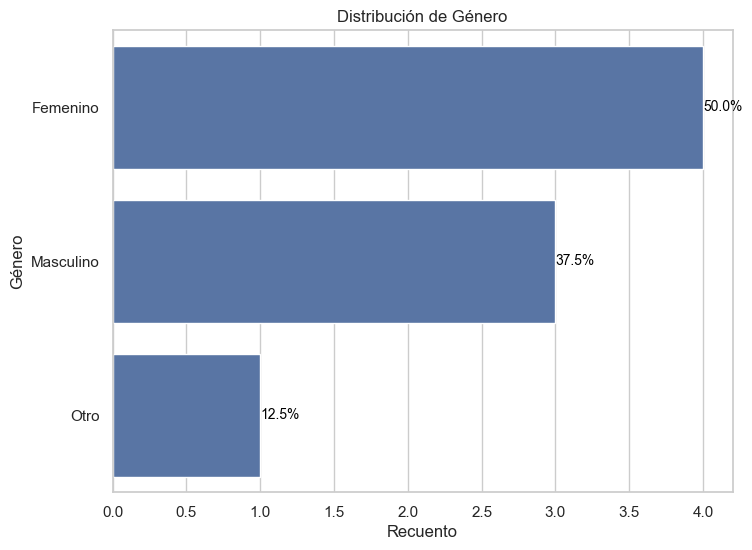

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame de ejemplo
data = {'Género': ['Femenino', 'Masculino', 'Femenino', 'Otro', 'Masculino', 'Femenino', 'Femenino', 'Masculino'],
        'Edad': [25, 30, 35, 40, 45, 50, 55, 60]}
df = pd.DataFrame(data)

# Crear el gráfico de barras con Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, y='Género')
plt.title("Distribución de Género")
plt.xlabel("Recuento")

# Calcular los porcentajes y agregar etiquetas
total_samples = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total_samples)
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2.
    ax.annotate(percentage, (x, y), ha='left', va='center', fontsize=10, color='black')

plt.show()
